<a href="https://colab.research.google.com/github/VanNguyenThiCam/LogisticRegression-/blob/main/Softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Đầu ra cần phân loại nhiều hơn 2 thì dùng hàm softmax thay vì dùng logistic**

In [7]:
import numpy as np
import tensorflow as tf

tf.keras.backend.set_floatx('float64')


#chuẩn bị data

from google.colab import drive #cách lấy dữ liệu trên google.colab 
drive.mount('/content/gdrive')

data = np.genfromtxt('/content/gdrive/MyDrive/Colab Notebooks/Data/iris_full_softmax.csv'
                      ,delimiter=',',skip_header = 1)

X = data[:,0:4]
y = data[:,4:]
N = X.shape[0]

X = np.c_[np.ones((N,1)),X] #

inds = np.arange(N)
np.random.shuffle(inds)

X = X[inds]
y = y[inds]


print(X[:7])
print(y[:7])

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[[1.  6.8 3.2 5.9 2.3]
 [1.  6.  3.4 4.5 1.6]
 [1.  6.7 2.5 5.8 1.8]
 [1.  5.1 3.7 1.5 0.4]
 [1.  6.3 3.3 6.  2.5]
 [1.  5.7 3.8 1.7 0.3]
 [1.  5.1 3.5 1.4 0.2]]
[[2.]
 [1.]
 [2.]
 [0.]
 [2.]
 [0.]
 [0.]]


In [8]:
#theta

D = 4+1
K = 3

theta = tf.Variable(tf.random.normal((D,K),dtype = tf.float64))

#forward

def compute_output(theta,X):
    return tf.math.softmax(X@theta) #sự khác biệt với logistic

In [9]:
#tham số

lr = 0.01
num_epochs = 1000
losses = []

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy() #nếu không xử lý 3 đầu ra 0,1,2

In [10]:
for epoch in range(num_epochs):
    with tf.GradientTape() as t:
        y_hat = compute_output(theta,X)

        loss = loss_fn(y,y_hat)
        losses.append(loss.numpy())

        dtheta = t.gradient(loss,theta)

        theta.assign_sub(lr*dtheta)
                      

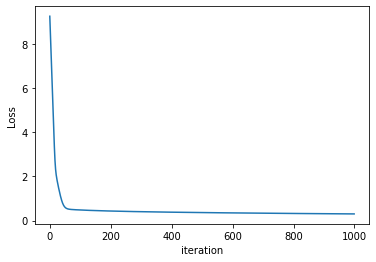

In [11]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()